In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
# Reading two csv files and combining them together
def read_data():

    df1=pd.read_csv('../outputfile_1.csv')
    df2=pd.read_csv('../outputfile_2.csv')
    df3=pd.read_csv('../outputfile_3.csv')
    df4=pd.read_csv('../outputfile_4.csv')

# df_parking=pd.read_csv('parking.csv')

    df=pd.concat([df1,df2,df3,df4])
    df_park=pd.concat([df2,df3,df4])
    df['VEHICLE']=np.where((df['CARS']==0) & (df['TWO_WHEELER']==0),0,1)
    df_park['VEHICLE']=np.where((df_park['CARS']==0) & (df_park['TWO_WHEELER']==0),0,1)
    return df,df_park
df,df_park=read_data()

In [4]:
def map_access_dis(ACCESS_DIS):
    if ACCESS_DIS in [1, 2]:
        return ACCESS_DIS
    elif ACCESS_DIS in [3,4]:
        return 3
    elif ACCESS_DIS in [5,6,7,8]:
        return 4
    elif ACCESS_DIS in [9,10,11]:
        return 5

# Apply the mapping function to create the 'ACCESS_DIS_B' column
df['ACCESS_DIS_B'] = df['ACCESS_DIS'].apply(map_access_dis)



# convert all values of EGRESS_DIS into integers
df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

def map_egress_dis(EGRESS_DIS):
    if EGRESS_DIS in [1,2]:
        return int(EGRESS_DIS)
    if EGRESS_DIS in [3,4]:
        return 3
    if EGRESS_DIS in [5,6,7,8]:
        return 4
    if EGRESS_DIS in [9,10,11]:
        return 5
    elif EGRESS_DIS in [0]:
        return 2
    
    

# Apply the mapping function to create the 'EGRESS_DIS_B' column
df['EGRESS_DIS_B'] = df['EGRESS_DIS'].apply(map_egress_dis)


([<matplotlib.axis.XTick at 0x2954d0618d0>,
 [Text(1.15, 0, '<0.5'),
  Text(2.0, 0, '0.5-1'),
  Text(3.15, 0, '1-2'),
  Text(4.0, 0, '2-4'),
  Text(4.85, 0, '>4')])

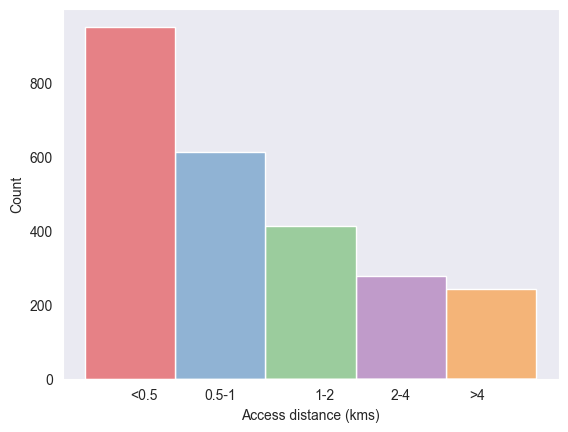

In [5]:
sns.set_style('dark')
sns.histplot(data=df,x='ACCESS_DIS_B',hue='ACCESS_DIS_B',discrete=True,palette='Set1')
plt.legend([],[], frameon=False)
plt.xlabel('Access distance (kms)')
plt.xticks([1.15,2,3.15,4,4.85],['<0.5','0.5-1','1-2','2-4','>4'])

([<matplotlib.axis.XTick at 0x2954cf46690>,
 [Text(1.15, 0, '<0.5'),
  Text(2.0, 0, '0.5-1'),
  Text(3.15, 0, '1-2'),
  Text(4.0, 0, '2-4'),
  Text(4.85, 0, '>4')])

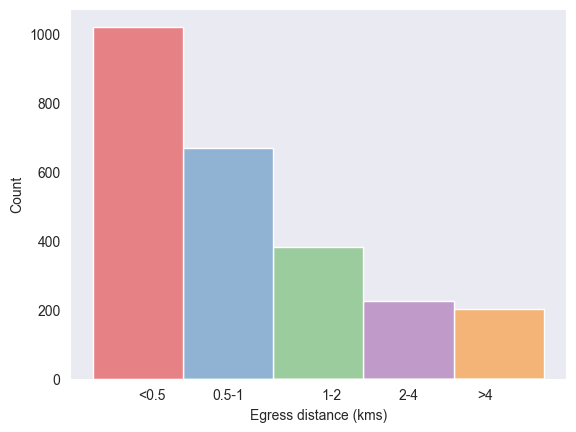

In [6]:
sns.set_style('dark')
sns.histplot(data=df,x='EGRESS_DIS_B',hue='EGRESS_DIS_B',discrete=True,palette='Set1')
plt.legend([],[], frameon=False)
plt.xlabel('Egress distance (kms)')
plt.xticks([1.15,2,3.15,4,4.85],['<0.5','0.5-1','1-2','2-4','>4'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


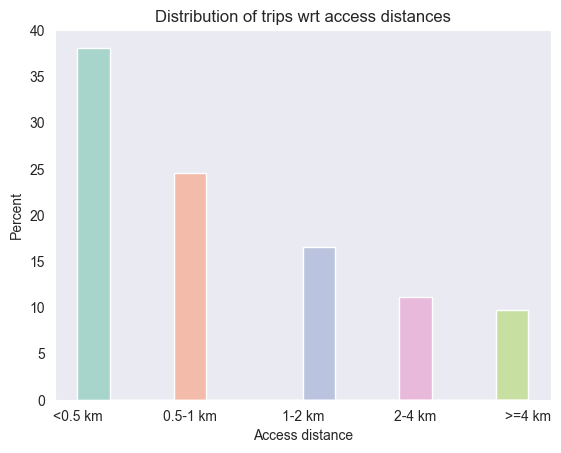

In [7]:
# lets the the number of values for each ACCESS_DIS_B for the column 'A_M' equal to Ride hire
df1=df.copy()

sns.set_style('dark')

sns.histplot(data=df1,x='ACCESS_DIS_B',stat='percent',hue='ACCESS_DIS_B',palette='Set2')
plt.xticks([1,2,3,4,5],['<0.5 km','0.5-1 km','1-2 km','2-4 km', '>=4 km'])
plt.title('Distribution of trips wrt access distances')
plt.xlabel('Access distance')
plt.legend().set_visible(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


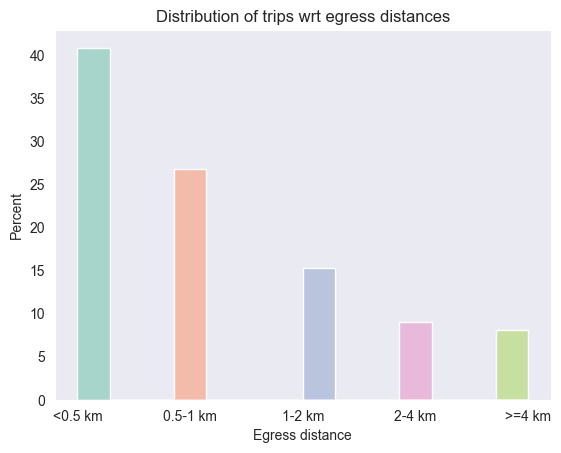

In [8]:
# lets the the number of values for each ACCESS_DIS_B for the column 'A_M' equal to Ride hire
df1=df.copy()

sns.set_style('dark')

sns.histplot(data=df1,x='EGRESS_DIS_B',stat='percent',hue='EGRESS_DIS_B',palette='Set2')
plt.xticks([1,2,3,4,5],['<0.5 km','0.5-1 km','1-2 km','2-4 km', '>=4 km'])
plt.title('Distribution of trips wrt egress distances')
plt.xlabel('Egress distance')
plt.legend().set_visible(False)

Now lets see statistics of time

In [23]:
df1=df[df['ACCESS_TIME']<30]
df1=df1[df1['EGRESS_TIME']<30]
df1=df1[df1['ACCESS_TIME']>0]
df1=df1[df1['EGRESS_TIME']>0]
df1['ACCESS_TIME'].describe()

count    2276.000000
mean        8.719684
std         5.052914
min         1.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        25.000000
Name: ACCESS_TIME, dtype: float64